# Project 2

In the coding project below, answer any bolded questions on Canvas via the assigment named Programming Project 2 Quiz Questions.

In the following exercise, we will perform exploratory data analysis (EDA) to extract insights using Python. This assignment continues off of the previous assignment (Project 1). If you wish, you may copy and paste your previous code into this notebook.

In this assignment, we will be using PennGrader, a Python package built by a former TA for autograding Python notebooks. PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. You will have 100 attempts per test case, which should be more than sufficient.

<b>NOTE：Please remember to remove the </b>

```python
raise notImplementedError
```
<b>after your implementation, otherwise the cell will not compile.</b>

## Getting Setup
Please run the below cells to get setup with the autograder. If you need to install packages, please uncomment and try the following lines; if they do not work, please try running them in the terminal without the `!` sign! (e.g. `pip install sklearn --user`

In [ ]:
%%capture
!pip install penngrader --user
!pip install seaborn --user

Let's try PennGrader out! Fill in the cell below with your PennID and then run the following cell to initialize the grader.

<font color='red'>Warning:</font> Please make sure you only have one copy of the student notebook in your directory in Codio upon submission. The autograder looks for the variable `STUDENT_ID` across all notebooks, so if there is a duplicate notebook, it will fail.

In [2]:
#PLEASE ENSURE YOUR STUDENT_ID IS ENTERED AS AN INT (NOT A STRING). IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 56803282                   # YOUR 8-DIGIT PENNID GOES HERE
STUDENT_NAME = "Jacky Choi"     # YOUR FULL NAME GOES HERE

In [3]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'ESE542_Online_Su_2021_HW2', student_id = STUDENT_ID)

In [4]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import seaborn as sns

#Plotting
import matplotlib.pyplot as plt

%matplotlib inline

## Part A

First, we return to the College dataset. This dataset contains the following variables from 777 different universities and colleges in the US:

| Column | Description | 
|:-|:-|
|Private | Public/private indicator|
|Apps | Number of applications received|
|Accept | Number of applicants accepted|
|Enroll | Number of new students enrolled|
|Top10perc | New students from top 10\% of high school class|
|Top25perc | New students from top 25\% of high school class|
|F.Undergrad | Number of full-time undergraduates|
|P.Undergrad | Number of part-time undergraduates|
|Outstate | Out-of-state tuition|
|Room.Board | Room and board costs|
|Books | Estimated book costs|
|Personal | Estimated personal spending|
|PhD | Percent of faculty with Ph.D.’s|
|Terminal | Percent of faculty with terminal degree|
|S.F.Ratio | Student/faculty ratio|
|Perc.alumni | Percent of alumni who donate|
|Expend | Instructional expenditure per student|
|Grad.Rate | Graduation rate|

In [5]:
college = pd.read_csv('College.csv').copy()
college = college.rename(columns = {'Grad.Rate':'Grad_Rate',
                              'S.F.Ratio': 'S_F_Ratio',
                              'perc.alumni':'perc_alumni',
                              'Room.Board':'Room_Board',
                              'F.Undergrad':'F_Undergrad',
                              'P.Undergrad':'P_Undergrad'})

In [6]:
college.set_index('Names', inplace = True)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
Names,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


1. Use the `seaborn` `pairplot()` function on the original dataframe with all universities to produce a scatterplot matrix of the ﬁrst ten columns of the data. Remember to use the `%matplotlib` inline command for plotting in Jupyter. Comment on your observations.

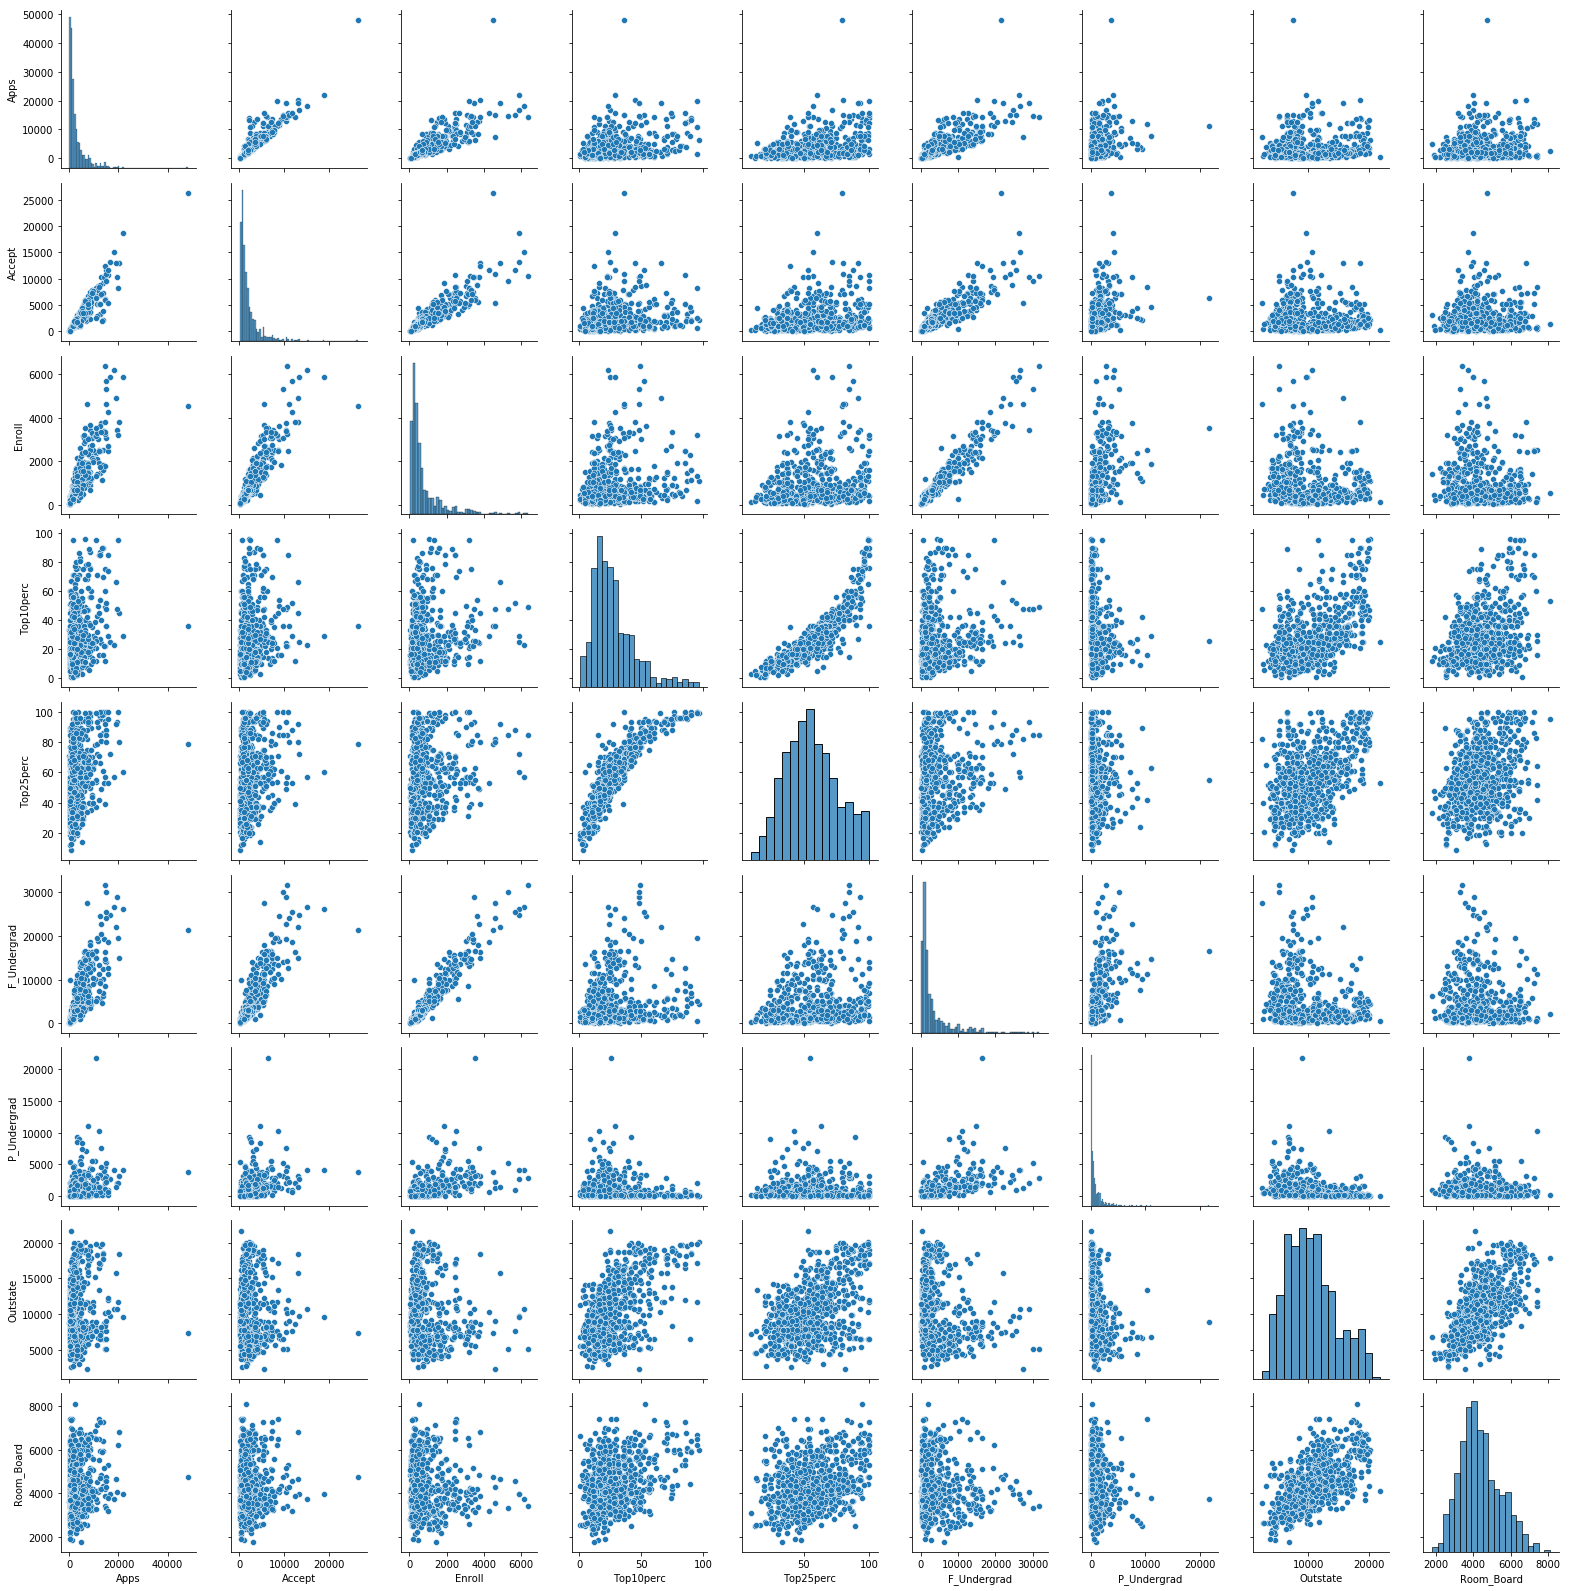

In [7]:
sns.pairplot(college.iloc[:, :10])
plt.show()

2. Use the `seaborn` `boxplot()` function on the original dataframe with all universities to produce side-by-side box plots of ‘Outstate’ versus ‘Private’. <b>Answer on Canvas: On average, are private universities more expensive than public universities?</b>

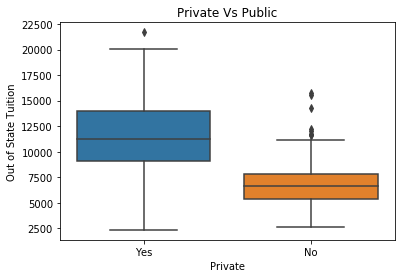

In [8]:
cd = sns.boxplot(x = college['Private'], y = college['Outstate'])
cd.set_xlabel('Private')
cd.set_ylabel('Out of State Tuition')
plt.title("Private Vs Public")
plt.show()
#On average, privates have a higher out of state tuition than public.

3. Create a new qualitative variable named `large_university` by binning the ‘Enroll’ column. We are going to divide universities into two groups based on whether the number of new students enrolled exceeds the average (mean) of all new students enrolled.  Hint: The variable `large_university` is an indicator variable (a Pandas series that represents a series of booleans, a list is also acceptable). In Python, this is called a "mask," which you can later manipulate to slice your data.

In [9]:
large_university = college['Enroll'] > college['Enroll'].mean()


In [10]:
grader.grade(test_case_id = 'large_university_bin_test', answer = large_university)

Correct! You earned 2.0/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


4. Create a dataframe called `large_universities` that only includes large universities.

In [23]:
college['large_university'] = college['Enroll'] > college['Enroll'].mean()
large_universities = college[college['large_university'] == True]
large_universities


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,large_university
Names,,,,,,,,,,,,,,,,,,,
Angelo State University,No,3540,2001,1016,24,54,4190,1512,5130,3592,500,2000,60,62,23.1,5,4010,34,True
Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70,True
Arizona State University Main campus,No,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48,True
Arkansas Tech University,No,1734,1729,951,12,52,3602,939,3460,2650,450,1000,57,60,19.6,5,4739,48,True
Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Michigan University,No,9167,7191,2738,24,53,15739,4278,6940,4100,500,1700,80,84,24.7,11,5983,55,True
Western Washington University,No,5548,3563,1549,30,71,8909,506,8124,4144,639,2385,83,89,22.7,10,7203,61,True
Westfield State College,No,3100,2150,825,3,20,3234,941,5542,3788,500,1300,75,79,15.7,20,4222,65,True


5. Use the `pandas` `describe(include = ‘all’)` function on large_universities to produce a numerical summary of each column. Within this dataframe, what is the $75^{th}$ percentile for the column ‘Enroll’? <b>Name this variable `enroll_answer` and enter your answer on Canvas.</b>

In [24]:
large_universities.describe(include = 'all')


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,large_university
count,218,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218
mean,NaN,7233.376147,4734.110092,1897.229358,31.224771,60.298165,9455.123853,1995.334862,9258.600917,4311.839450,581.032110,1661.110092,80.853211,86.481651,15.493578,18.119266,10663.669725,63.963303,NaN
std,NaN,5069.744625,3186.820612,1124.121061,21.994342,21.117579,5978.291505,2369.873736,4409.338645,1246.859667,173.273615,736.371392,11.160600,10.222508,4.764428,10.702276,7803.519970,18.260494,NaN
min,NaN,1256.000000,1068.000000,781.000000,3.000000,18.000000,1320.000000,16.000000,2340.000000,1780.000000,96.000000,300.000000,37.000000,43.000000,3.300000,0.000000,3605.000000,10.000000,NaN
25%,NaN,3943.250000,2686.500000,1058.000000,15.000000,45.000000,5023.250000,658.500000,6197.250000,3413.000000,500.000000,1153.000000,74.000000,81.000000,13.125000,10.000000,6313.500000,52.000000,NaN
50%,NaN,6003.500000,3752.500000,1548.000000,25.000000,57.500000,7533.500000,1354.500000,7822.000000,4077.500000,599.000000,1583.500000,82.000000,89.000000,16.300000,16.000000,8100.500000,63.500000,NaN
75%,NaN,8756.500000,5692.250000,2408.000000,40.000000,74.500000,12791.750000,2574.000000,11596.000000,5085.500000,650.000000,2000.000000,89.000000,94.000000,18.975000,23.000000,11016.500000,75.000000,NaN


In [25]:
enroll_answer = large_universities['Enroll'].quantile(0.75)
print(enroll_answer)

2408.0


In [26]:
grader.grade(test_case_id = 'enroll_test', answer = enroll_answer)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. Use the `seaborn` `boxplot()` function on the large_university variable to determine whether larger universities are more expensive. <b>Answer on Canvas: On average, are large universities more expensive than small universities?</b>

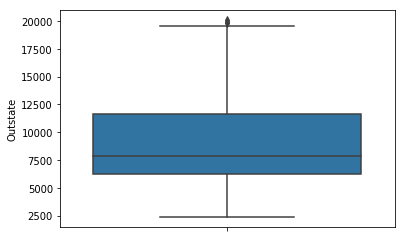

In [27]:
sns.boxplot(y=college[large_university]['Outstate'])

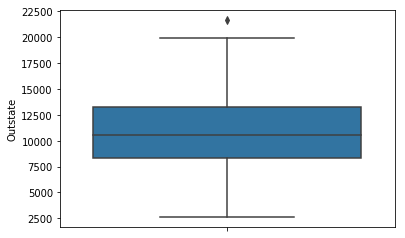

In [28]:
sns.boxplot(y=college[~large_university]['Outstate'])

7. To further examine the relationship between the size of a university against its out-of-state tuition, plot a scatter plot. <b>Answer on Canvas: What type of relationship does this show (weak, medium, strong)?</b> Hint: Use the enrollment class size as a proxy for the size of a university.

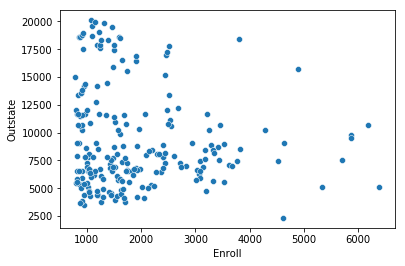

In [29]:
sns.scatterplot(x=large_universities['Enroll'], y=large_universities['Outstate'])

In [30]:
college.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,large_university
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755,0.683262
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313,0.692241
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341,0.751375
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989,0.129871
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281,0.142033
F_Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773,0.741454
P_Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001,0.467932
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290,-0.183608
Room_Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942,-0.026032
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061,0.119793


8. Use `matplotlib.pyplot.hist()` or `seaborn.distplot()` to produce some histograms with different numbers of bins for a few of the quantitative variables. You may ﬁnd the `matplotlib.pyplot.subplot()` function useful to plot multiple graphs under a single codeblock. In particular, create a histogram to examine the number of applications received with a bin size of 200. <b>Answer on Canvas: Are there more universities that receive 0 to 10,000 applications or 10,000 to 20,000 applications?</b>

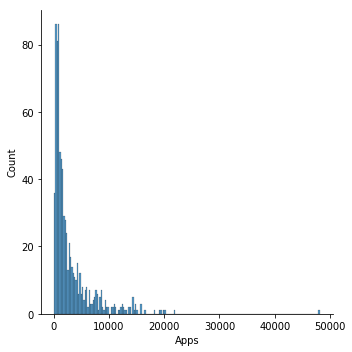

In [31]:
sns.displot(college['Apps'], bins=200)

9. We are interested in the acceptance rate of these universities. To calculate the acceptance rate, we take the ‘Accept’ column and divide by the ‘Apps’ column. Add this column to a copied version of the original dataframe. Remember to copy the dataframe first before performing feature transformation, as we do not wish to alter or inadvertently create new columns in our original data. <b>Name your new column `acceptance_rate`. Answer on Canvas: Is there a positive or negative relationship between the university’s acceptance rate and the percentage of students in the university who graduated from the top 10% from high school?</b>

In [32]:
college_new = college.copy() #use copy() to assign to a new variable
acceptance_rate = college_new['Accept'] / college_new['Apps']
college_new['Acceptance_Rate'] = acceptance_rate
college_new.head()



,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,large_university,Acceptance_Rate
Names,,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False,0.742169
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False,0.880146
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False,0.768207
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,False,0.836930
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False,0.756477


In [33]:
grader.grade(test_case_id = 'acceptance_rate_test', answer = acceptance_rate)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


*You may plot the university’s acceptance rate vs the percentage of students in the university who graduated from the top 10% from high school.*

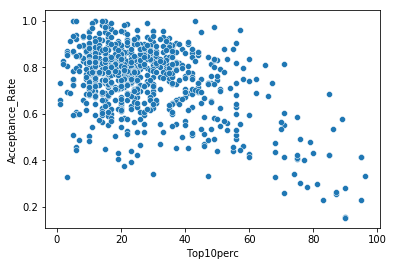

In [53]:
sns.scatterplot(y = college_new['Acceptance_Rate'], x = college_new["Top10perc"])

10. Continue exploring the data and provide a brief summary of what you discover.

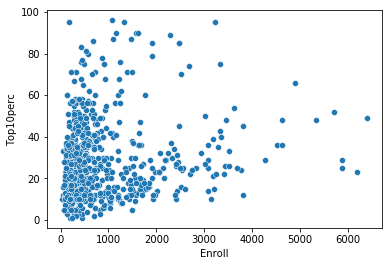

In [35]:
sns.scatterplot(x= college_new['Enroll'], y = college_new["Top10perc"])

In [54]:
college_new.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate,large_university,Acceptance_Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755,0.683262,-0.392555
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313,0.692241,-0.175196
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341,0.751375,-0.152174
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989,0.129871,-0.478675
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281,0.142033,-0.434672
F_Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773,0.741454,-0.155654
P_Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001,0.467932,-0.092287
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290,-0.183608,-0.240951
Room_Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942,-0.026032,-0.310302
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061,0.119793,-0.174073


## Part B

Next, let’s turn to the Boston housing dataset, which contains the following variables from 506 different towns in Boston collected by the US Census Service:

|Column |Description|
|:-|:-|
|CRIM | per capita crime rate by town|
|ZN | proportion of residential land zoned for lots over 25,000 sq.ft|
|INDUS | proportion of non-retail business acres per town|
|CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
|NOX | nitric oxides concentration (parts per 10 million)|
|RM | average number of rooms per dwelling|
|AGE | proportion of owner-occupied units built prior to 1940|
|DIS | weighted distances to five Boston employment centres|
|RAD | index of accessibility to radial highways|
|TAX | full-value property-tax rate per \$10,000|
|PTRATIO | pupil-teacher ratio by town|
|B | $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of African Americans by town|
|LSTAT | \% lower status of the population|
|MEDV | Median value of owner-occupied homes in \$1000's|

1. To begin, load the Boston dataset. We can fetch this dataset by calling sklearn’s API.

In [36]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = pd.Series(boston_dataset.target)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


2. Make pairwise scatterplots of some predictors (columns) in this dataset. Since this dataset includes many predictors, avoid using the `seaborn` `pairplot()` function with all the predictors to minimize run-time. Comment on your observations. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


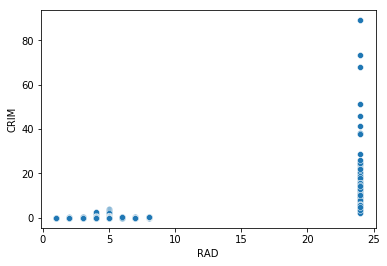

In [37]:
sns.scatterplot(y = boston['CRIM'], x= boston['RAD'])
boston.corr()
#I think its RAD?

3. Are any of the predictors associated with per capita crime rate?  If so, explain the relationship. <b>Answer on Canvas: Which predictor has the highest correlation with ‘CRIM’, besides ‘CRIM’ itself?<b>

In [38]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


4. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor. <b>Answer on Canvas: Which town number has the highest crime rate? Which town number has the lowest tax rate? Which town number has the highest pupil-teacher ratio?</b> Hint: Name the variables `highest_crim`, `lowest_tax`, and `highest_pup` respectively. If there are multiple towns that share the same value, choose the first observation.

In [39]:
highest_crim = boston['CRIM'].idxmax()
print(highest_crim)

380


In [40]:
grader.grade(test_case_id = 'highest_crim_test', answer = highest_crim)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [41]:
lowest_tax = boston['TAX'].idxmin()
print(lowest_tax)


353


In [42]:
grader.grade(test_case_id = 'lowest_tax_test', answer = lowest_tax)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [43]:
highest_pup = boston['PTRATIO'].idxmax()

print(highest_pup)

354


In [44]:
grader.grade(test_case_id = 'highest_pup_test', answer = highest_pup)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


5. Count the number of towns in this dataset that are bound to the Charles river and name this number as the variable `charles`. <b>Enter your answer on Canvas.</b>

In [45]:
charles = boston['CHAS'].sum()
print("There are %s towns bound to the Charles River and %s that are not." % (charles, 506-charles))



There are 35.0 towns bound to the Charles River and 471.0 that are not.


In [46]:
grader.grade(test_case_id = 'charles_test', answer = charles)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


6. What is the median pupil-teacher ratio among the towns in this dataset? Name this number as the variable `med_pt`.<b> Enter your answer on Canvas.</b>

In [55]:
med_pt = boston['PTRATIO'].median()
print("The median pupil-to-teacher ratio is %s." % med_pt)

The median pupil-to-teacher ratio is 19.05.


In [56]:
grader.grade(test_case_id = 'med_pt_test', answer = med_pt)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


7. Which town of Boston has lowest median value of owner- occupied homes? Name this index as the variable `min_medv` and <b>enter your answer on Canvas</b>. If there are multiple towns with the same minimum median value, then choose the first such observation. What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your observations.

In [49]:
min_medv = boston['MEDV'].idxmin()
print("The lowest median value of owner- occupied homes is town #%s." % min_medv)
boston.iloc[[min_medv]] # double brackets for Pandas dataframe



The lowest median value of owner- occupied homes is town #398.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.9,30.59,5.0


In [50]:
grader.grade(test_case_id = 'min_medv_test', answer = min_medv)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


8. In this data set, how many of the suburbs average more than eight rooms per dwelling? Name this number as the variable `num_rooms` and <b>enter your answer on Canvas</b>. Comment on the suburbs that average more than eight rooms per dwelling.

In [51]:
num_rooms = (boston['RM'] > 8).sum()
num_rooms

13

In [52]:
grader.grade(test_case_id = 'num_rooms_test', answer = num_rooms)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


*What other observations can you make from this dataset?*

## Submit

You're done! Please make sure you've run all the PennGrader cells and count up your score to be sure (there are 20 points in total) and then make sure to submit this on Codio.